**Visualization of Result Output**

In [12]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
path="../ACM/results_output_acm.csv"
data=pd.read_csv(path)
data



,precision,recall,f1_score,execution_time,threshold,two_step,bleu_1,bleu_2,bleu_3,bleu_4,prompt_token_count,candidates_token_count,total_token_count,total_calls,tp,fp,fn
0,0.191429,0.67,0.297778,1108.981987,0.500,True,0.874737,0.856524,0.846867,0.839002,1424463,9940,1434403,9940,67,283,33
1,0.009759,0.97,0.019323,495.324947,0.500,False,0.992497,0.991192,0.990129,0.989140,0,0,0,0,97,9843,3
2,0.236486,0.70,0.353535,1087.474749,0.625,True,0.878290,0.860103,0.851972,0.845603,1301801,9159,1310960,9159,70,226,30
3,0.010263,0.94,0.020305,493.607675,0.625,False,0.983833,0.981378,0.979662,0.978123,0,0,0,0,94,9065,6
4,0.347826,0.64,0.450704,969.931373,0.750,True,0.836369,0.812325,0.800407,0.790944,925425,6490,931915,6490,64,120,36
5,0.013559,0.88,0.026707,493.877227,0.750,False,0.954042,0.946295,0.942824,0.940026,0,0,0,0,88,6402,12
6,0.925926,0.25,0.393701,652.420490,0.875,True,0.505475,0.433565,0.396436,0.366737,22763,162,22925,162,25,2,75
7,0.308642,0.50,0.381679,493.559368,0.875,False,0.675525,0.627806,0.605959,0.587118,0,0,0,0,50,112,50
8,0.960000,0.24,0.384000,606.873065,0.900,True,0.479691,0.407567,0.372799,0.342756,6397,45,6442,45,24,1,76
9,0.822222,0.37,0.510345,493.892956,0.900,False,0.565539,0.501889,0.473229,0.448585,0,0,0,0,37,8,63


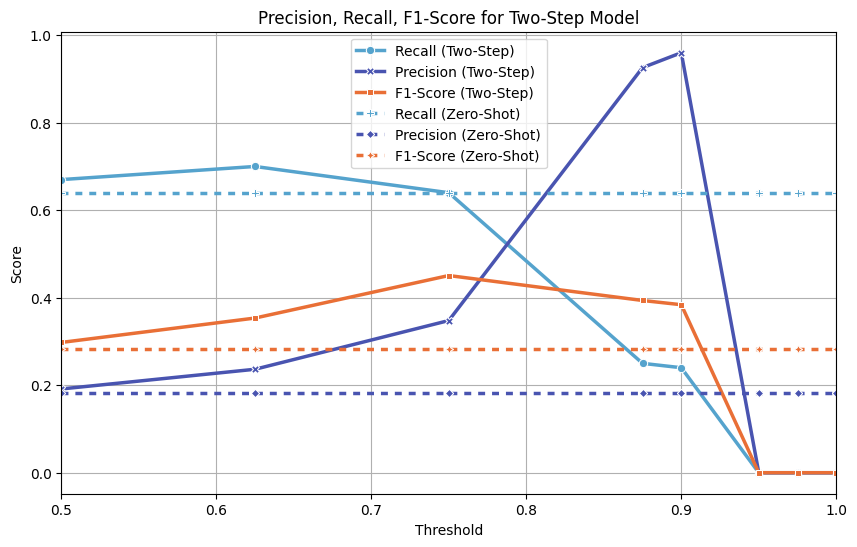

In [14]:
data_true = data[data['two_step'] == True]
data_zero_shot = data[pd.isna(data['two_step'])]

# Sort by threshold for proper line plotting
data_true = data_true.sort_values('threshold')

# Generate colors using the specified palette
palette = sns.color_palette("icefire", 6)
recall_color, precision_color, f1_color = palette[0], palette[1], palette[5]  # Pick well-separated colors

# Interpolate zero-shot values to match data_true threshold points
recall_zero_shot_interp = np.interp(data_true['threshold'], data_zero_shot['threshold'], data_zero_shot['recall'])
precision_zero_shot_interp = np.interp(data_true['threshold'], data_zero_shot['threshold'], data_zero_shot['precision'])
f1_zero_shot_interp = np.interp(data_true['threshold'], data_zero_shot['threshold'], data_zero_shot['f1_score'])

# Extend the thresholds to include 1.0
thresholds_extended = np.append(data_true['threshold'], 1.0)

# Interpolate the values to match the new threshold of 1.0
recall_zero_shot_interp_extended = np.append(recall_zero_shot_interp, np.interp(1.0, data_zero_shot['threshold'], data_zero_shot['recall']))
precision_zero_shot_interp_extended = np.append(precision_zero_shot_interp, np.interp(1.0, data_zero_shot['threshold'], data_zero_shot['precision']))
f1_zero_shot_interp_extended = np.append(f1_zero_shot_interp, np.interp(1.0, data_zero_shot['threshold'], data_zero_shot['f1_score']))

# Create a DataFrame for Seaborn with the extended data
plot_data = pd.concat([
    pd.DataFrame({'Threshold': thresholds_extended, 'Score': np.append(data_true['recall'], data_true['recall'].values[-1]), 'Metric': 'Recall (Two-Step)'}),
    pd.DataFrame({'Threshold': thresholds_extended, 'Score': np.append(data_true['precision'], data_true['precision'].values[-1]), 'Metric': 'Precision (Two-Step)'}),
    pd.DataFrame({'Threshold': thresholds_extended, 'Score': np.append(data_true['f1_score'], data_true['f1_score'].values[-1]), 'Metric': 'F1-Score (Two-Step)'}),
    pd.DataFrame({'Threshold': thresholds_extended, 'Score': recall_zero_shot_interp_extended, 'Metric': 'Recall (Zero-Shot)'}),
    pd.DataFrame({'Threshold': thresholds_extended, 'Score': precision_zero_shot_interp_extended, 'Metric': 'Precision (Zero-Shot)'}),
    pd.DataFrame({'Threshold': thresholds_extended, 'Score': f1_zero_shot_interp_extended, 'Metric': 'F1-Score (Zero-Shot)'})
])

# Define custom colors for each metric
custom_palette = {
    'Recall (Two-Step)': recall_color,
    'Precision (Two-Step)': precision_color,
    'F1-Score (Two-Step)': f1_color,
    'Recall (Zero-Shot)': recall_color,
    'Precision (Zero-Shot)': precision_color,
    'F1-Score (Zero-Shot)': f1_color
}

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=plot_data, 
    x='Threshold', 
    y='Score', 
    hue='Metric', 
    style='Metric',
    linewidth=2.5, 
    markers=True, 
    dashes={'Recall (Two-Step)': '', 'Precision (Two-Step)': '', 'F1-Score (Two-Step)': '', 
            'Recall (Zero-Shot)': (2, 2), 'Precision (Zero-Shot)': (2, 2), 'F1-Score (Zero-Shot)': (2, 2)},
    palette=custom_palette  # Apply custom colors
)

# Plot settings
plt.xlabel('Threshold')
plt.xlim(0.5, 1)  # Ensure the lower bound is 0.5 and the upper bound is 1.0
plt.ylabel('Score')
plt.title('Precision, Recall, F1-Score for Two-Step Model')
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig('../saved_plots/acm_two_step_vs_zero_shot.png', dpi=300, bbox_inches='tight')
plt.show()

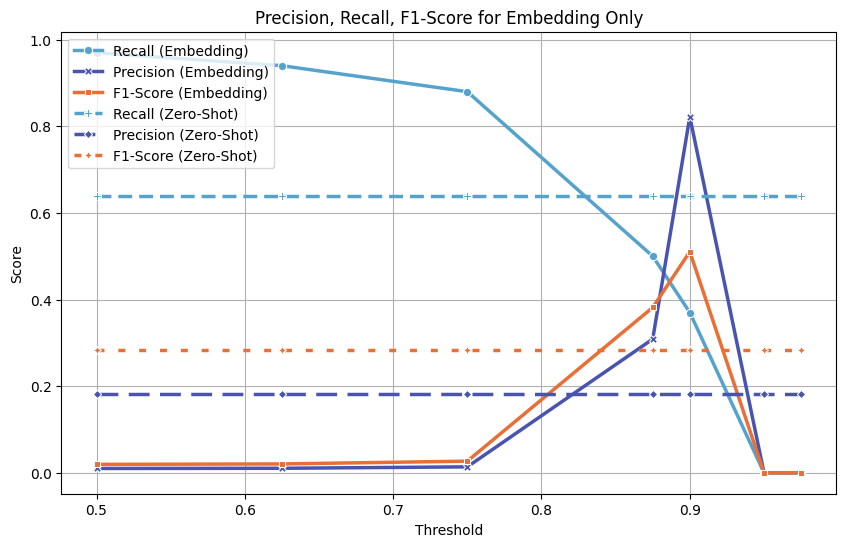

In [15]:
# Filter rows where 'two_step' is False
data_false = data[data['two_step'] == False]

# Sort by threshold for proper line plotting
data_false = data_false.sort_values('threshold')

# Interpolate zero-shot values to match data_false threshold points
recall_zero_shot_interp = np.interp(data_false['threshold'], data_zero_shot['threshold'], data_zero_shot['recall'])
precision_zero_shot_interp = np.interp(data_false['threshold'], data_zero_shot['threshold'], data_zero_shot['precision'])
f1_zero_shot_interp = np.interp(data_false['threshold'], data_zero_shot['threshold'], data_zero_shot['f1_score'])

# Create a DataFrame for Seaborn
plot_data = pd.concat([
    pd.DataFrame({'Threshold': data_false['threshold'], 'Score': data_false['recall'], 'Metric': 'Recall (Embedding)'}),
    pd.DataFrame({'Threshold': data_false['threshold'], 'Score': data_false['precision'], 'Metric': 'Precision (Embedding)'}),
    pd.DataFrame({'Threshold': data_false['threshold'], 'Score': data_false['f1_score'], 'Metric': 'F1-Score (Embedding)'}),
    pd.DataFrame({'Threshold': data_false['threshold'], 'Score': recall_zero_shot_interp, 'Metric': 'Recall (Zero-Shot)'}),
    pd.DataFrame({'Threshold': data_false['threshold'], 'Score': precision_zero_shot_interp, 'Metric': 'Precision (Zero-Shot)'}),
    pd.DataFrame({'Threshold': data_false['threshold'], 'Score': f1_zero_shot_interp, 'Metric': 'F1-Score (Zero-Shot)'})
])

# Define custom colors for each metric
custom_palette = {
    'Recall (Embedding)': recall_color,
    'Precision (Embedding)': precision_color,
    'F1-Score (Embedding)': f1_color,
    'Recall (Zero-Shot)': recall_color,
    'Precision (Zero-Shot)': precision_color,
    'F1-Score (Zero-Shot)': f1_color
}

# Custom dash patterns for Zero-Shot
custom_dashes = {
    'Recall (Embedding)': '', 
    'Precision (Embedding)': '', 
    'F1-Score (Embedding)': '', 
    'Recall (Zero-Shot)': (4, 2),  # Adjusted dashes for Zero-Shot Recall
    'Precision (Zero-Shot)': (6, 3),  # Adjusted dashes for Zero-Shot Precision
    'F1-Score (Zero-Shot)': (2, 4)  # Adjusted dashes for Zero-Shot F1
}

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=plot_data, 
    x='Threshold', 
    y='Score', 
    hue='Metric', 
    style='Metric',
    linewidth=2.5,  # Increased line thickness for better visibility
    markers=True,  # Markers at each point
    dashes=custom_dashes,  # Custom dash styles for Zero-Shot
    palette=custom_palette  # Apply custom colors
)

# Plot settings
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, F1-Score for Embedding Only')
plt.legend(loc='upper left')
plt.grid(True)

# Save the plot in the saved_plots directory
plt.savefig('../saved_plots/acm_embedding_vs_zero_shot.png', dpi=300, bbox_inches='tight')
plt.show()

In [16]:
# Filter rows where 'two_step' is True
data_false = data[data['two_step'] == False]

# Sort by threshold for proper line plotting
data_false = data_false.sort_values('threshold')

data_false



,precision,recall,f1_score,execution_time,threshold,two_step,bleu_1,bleu_2,bleu_3,bleu_4,prompt_token_count,candidates_token_count,total_token_count,total_calls,tp,fp,fn
1,0.009759,0.97,0.019323,495.324947,0.500,False,0.992497,0.991192,0.990129,0.989140,0,0,0,0,97,9843,3
3,0.010263,0.94,0.020305,493.607675,0.625,False,0.983833,0.981378,0.979662,0.978123,0,0,0,0,94,9065,6
5,0.013559,0.88,0.026707,493.877227,0.750,False,0.954042,0.946295,0.942824,0.940026,0,0,0,0,88,6402,12
7,0.308642,0.50,0.381679,493.559368,0.875,False,0.675525,0.627806,0.605959,0.587118,0,0,0,0,50,112,50
9,0.822222,0.37,0.510345,493.892956,0.900,False,0.565539,0.501889,0.473229,0.448585,0,0,0,0,37,8,63
11,0.000000,0.00,0.000000,492.451452,0.950,False,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,100
13,0.000000,0.00,0.000000,493.420158,0.975,False,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,100


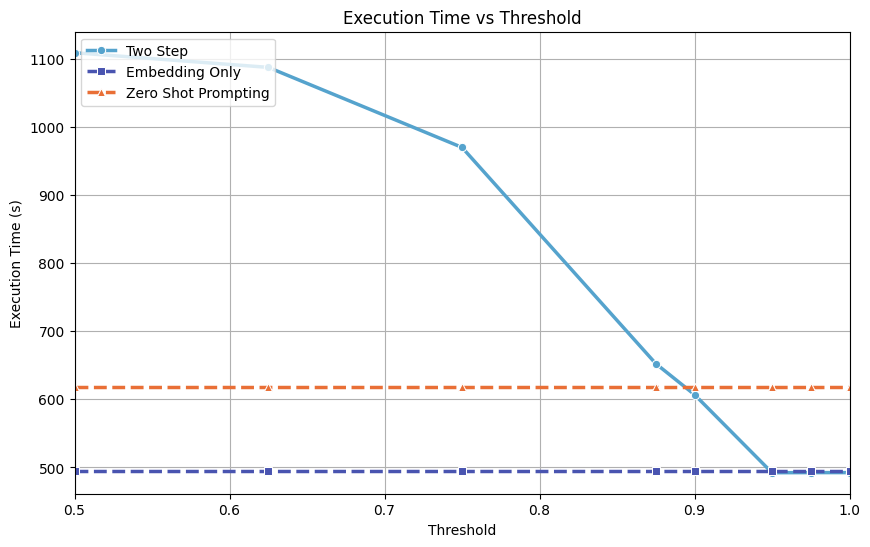

In [17]:
thresholds = data_true['threshold'].values
# Extend thresholds to 1.0
thresholds_extended = np.append(thresholds, 1.0)
# Extract execution time for "Zero Shot" (assumed single value for Zero-Shot data)
execution_time_zero_shot = data_zero_shot['execution_time'].values[0]  # Extract single value

# Create an array of repeated values for zero-shot execution time
execution_time_zero_shot_line = np.full(len(thresholds), execution_time_zero_shot)

# Create an array for "Embedding Only" execution time (also assumed to be a single value for Embedding Only data)
execution_time_embedding_only = np.full(len(thresholds), data_false['execution_time'].values[0])

# Extend the execution times to include the 1.0 threshold
execution_time_zero_shot_line_extended = np.append(execution_time_zero_shot_line, execution_time_zero_shot)
execution_time_embedding_only_extended = np.append(execution_time_embedding_only, data_false['execution_time'].values[0])


# Extend execution time values to match threshold extension
execution_time_zero_shot_line_extended = np.append(execution_time_zero_shot_line, execution_time_zero_shot)
execution_time_embedding_only_extended = np.append(execution_time_embedding_only, data_false['execution_time'].values[0])


# Interpolate or extend data_true execution time to include 1.0
execution_time_true_extended = np.append(data_true['execution_time'].values, data_true['execution_time'].values[-1]) 

# Plot execution time vs threshold using Seaborn
plt.figure(figsize=(10, 6))

# Plot each line using Seaborn
sns.lineplot(x=thresholds_extended, y=execution_time_true_extended, label='Two Step', marker='o', color=recall_color, linewidth=2.5)
sns.lineplot(x=thresholds_extended, y=execution_time_embedding_only_extended, label='Embedding Only', marker='s', linestyle="--", color=precision_color, linewidth=2.5)
sns.lineplot(x=thresholds_extended, y=execution_time_zero_shot_line_extended, label='Zero Shot Prompting', marker='^', linestyle='--', color=f1_color, linewidth=2.5)

# Plot a vertical dotted line at the intersection threshold
#plt.axvline(x=0.787, linestyle=':', color='black', linewidth=1)

# Plot settings
plt.xlabel('Threshold')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs Threshold')
plt.legend(loc='upper left')
plt.grid(True)

# Ensure x-axis starts at 0.5 and ends at 1.0
plt.xlim(0.5, 1.0)

# Save the plot
plt.savefig('../saved_plots/acm_execution_times_emb_zero_two_step.png')
plt.show()

In [18]:
data[data['two_step'] == True]

,precision,recall,f1_score,execution_time,threshold,two_step,bleu_1,bleu_2,bleu_3,bleu_4,prompt_token_count,candidates_token_count,total_token_count,total_calls,tp,fp,fn
0,0.191429,0.67,0.297778,1108.981987,0.500,True,0.874737,0.856524,0.846867,0.839002,1424463,9940,1434403,9940,67,283,33
2,0.236486,0.70,0.353535,1087.474749,0.625,True,0.878290,0.860103,0.851972,0.845603,1301801,9159,1310960,9159,70,226,30
4,0.347826,0.64,0.450704,969.931373,0.750,True,0.836369,0.812325,0.800407,0.790944,925425,6490,931915,6490,64,120,36
6,0.925926,0.25,0.393701,652.420490,0.875,True,0.505475,0.433565,0.396436,0.366737,22763,162,22925,162,25,2,75
8,0.960000,0.24,0.384000,606.873065,0.900,True,0.479691,0.407567,0.372799,0.342756,6397,45,6442,45,24,1,76
10,0.000000,0.00,0.000000,492.216923,0.950,True,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,100
12,0.000000,0.00,0.000000,492.387929,0.975,True,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,100


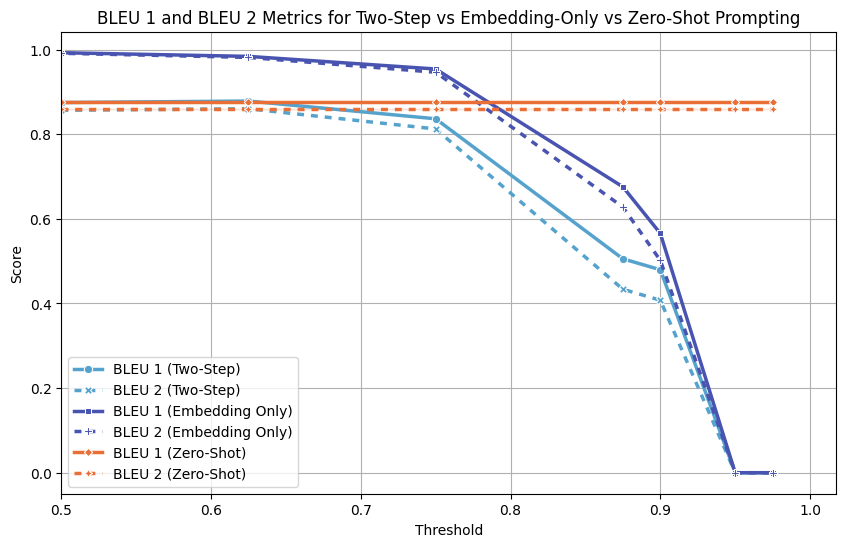

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming data_true, data_false, and data_zero_shot are already defined

# Generate the color palette from seaborn
palette = sns.color_palette("icefire", 6)
precision_color = palette[0]  # BLEU 1 color (Two-Step)
recall_color = palette[1]  # BLEU 2 color (Embedding Only)
f1_color = palette[5]  # BLEU 2 color (Zero-Shot)

# Interpolate zero-shot values to match data_true and data_false threshold points
bleu_1_zero_shot_interp_true = np.interp(data_true['threshold'], data_zero_shot['threshold'], data_zero_shot['bleu_1'])
bleu_2_zero_shot_interp_true = np.interp(data_true['threshold'], data_zero_shot['threshold'], data_zero_shot['bleu_2'])
bleu_1_zero_shot_interp_false = np.interp(data_false['threshold'], data_zero_shot['threshold'], data_zero_shot['bleu_1'])
bleu_2_zero_shot_interp_false = np.interp(data_false['threshold'], data_zero_shot['threshold'], data_zero_shot['bleu_2'])

# Combine the additional data with the original plot data
plot_data = pd.concat([
    pd.DataFrame({'Threshold': data_true['threshold'], 'Score': data_true['bleu_1'], 'Metric': 'BLEU 1 (Two-Step)', 'Method': 'Two-Step'}),
    pd.DataFrame({'Threshold': data_true['threshold'], 'Score': data_true['bleu_2'], 'Metric': 'BLEU 2 (Two-Step)', 'Method': 'Two-Step'}),
    pd.DataFrame({'Threshold': data_false['threshold'], 'Score': data_false['bleu_1'], 'Metric': 'BLEU 1 (Embedding Only)', 'Method': 'Embedding Only'}),
    pd.DataFrame({'Threshold': data_false['threshold'], 'Score': data_false['bleu_2'], 'Metric': 'BLEU 2 (Embedding Only)', 'Method': 'Embedding Only'}),
    pd.DataFrame({'Threshold': data_true['threshold'], 'Score': bleu_1_zero_shot_interp_true, 'Metric': 'BLEU 1 (Zero-Shot)', 'Method': 'Zero-Shot'}),
    pd.DataFrame({'Threshold': data_true['threshold'], 'Score': bleu_2_zero_shot_interp_true, 'Metric': 'BLEU 2 (Zero-Shot)', 'Method': 'Zero-Shot'}),
    pd.DataFrame({'Threshold': data_false['threshold'], 'Score': bleu_1_zero_shot_interp_false, 'Metric': 'BLEU 1 (Zero-Shot)', 'Method': 'Zero-Shot'}),
    pd.DataFrame({'Threshold': data_false['threshold'], 'Score': bleu_2_zero_shot_interp_false, 'Metric': 'BLEU 2 (Zero-Shot)', 'Method': 'Zero-Shot'}) # Add the new data for threshold 0.125
])

# Define custom palette for consistency
custom_palette = {
    'BLEU 1 (Two-Step)': precision_color,
    'BLEU 2 (Two-Step)': precision_color,
    'BLEU 1 (Embedding Only)': recall_color,
    'BLEU 2 (Embedding Only)': recall_color,
    'BLEU 1 (Zero-Shot)': f1_color,
    'BLEU 2 (Zero-Shot)': f1_color
}

# Define dash patterns for Zero-Shot and Embedding Only (dashed lines)
dashes_dict = {
    'BLEU 1 (Two-Step)': (),  # Solid line for BLEU 1 (Two-Step)
    'BLEU 1 (Embedding Only)': (),  # Solid line for BLEU 1 (Embedding Only)
    'BLEU 1 (Zero-Shot)': (),  # Solid line for BLEU 1 (Zero-Shot)
    
    'BLEU 2 (Two-Step)': (2,2),  # Solid line for BLEU 2 (Two-Step)
    'BLEU 2 (Embedding Only)': (2, 2),  # Dashed line for BLEU 2 (Embedding Only)
    'BLEU 2 (Zero-Shot)': (2, 2)  # Dashed line for BLEU 2 (Zero-Shot)
}

# Plot using Seaborn
plt.figure(figsize=(10, 6))

# Plot the lines for each metric with respective colors and line styles
sns.lineplot(data=plot_data, x='Threshold', y='Score', hue='Metric', style='Metric', markers=True, 
             linewidth=2.5, palette=custom_palette, dashes=dashes_dict)

# Plot settings
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('BLEU 1 and BLEU 2 Metrics for Two-Step vs Embedding-Only vs Zero-Shot Prompting')
plt.legend(loc='lower left')
plt.grid(True)
plt.xlim(0.5, None) 
# Save the plot
plt.savefig('../saved_plots/acm_combined_bleu_metrics.png',dpi=300, bbox_inches='tight')
plt.show()
